<h2 style="display: flex; justify-content: space-between; align-items: center;">
    <span>Exercise 4b</span>
    <span>Date: 22/01/2025</span>
</h2>

<h2 style="text-align:center;">Linear Regression - Multivariate dataset</h2>

### <ins>**Aim:**</ins> To build a Linear Regression model to predict the price of house based on features in multivariate housing dataset.

### <ins>**Algorithm:**</ins>

The Linear Regression algorithm aims to model the relationship between multiple independent variables (features) and a dependent variable (target) by fitting a linear equation to observed data.</br>It assumes that there is a linear relationship between the features and the target, and it tries to minimize the difference between predicted and actual target values.

The model is represented by the equation:

$$
y = \beta_0 + \beta_1x_1 + \beta_2x_2 + \dots + \beta_nx_n
$$

Where:
&emsp;$(y)$ is the dependent variable (target).
- $(\beta_0)$ is the intercept (constant term).
- $(\beta_1, \beta_2, \dots, \beta_n)$ are the coefficients (weights) of the features $( x_1, x_2, \dots, x_n)$, representing the impact of each feature on the target variable.


Step 1: Import Libraries

- Import necessary Python libraries like pandas, numpy, matplotlib, and scikit-learn modules for data preprocessing, model building, and evaluation.

Step 2: Load the Dataset

- Load the multivariate dataset using pandas read_csv() function.
- Use df.info() to examine the structure of the dataset, checking for data types, null values, and the number of records.

Step 3: Prepare the Data

- Check for missing or null values in the dataset using df.isna().sum().
- Handle missing values by using techniques like mean imputation, deletion, or other relevant methods depending on the data.
- Drop irrelevant columns (e.g., non-feature columns such as address or names).

Step 4: Feature Selection and Target Variable

- Identify and separate the features (independent variables) and the target variable (dependent variable).
- In this case, features could be multiple columns representing the house's characteristics, and the target is the price of the house.

Step 5: Data Transformation and Scaling

- Standardize the features using techniques like StandardScaler from scikit-learn to ensure the features are on a similar scale.

Step 6: Train-Test Split

- Split the dataset into training and testing sets using train_test_split. Typically, 80% of the data is used for training, and 20% is used for testing.

Step 7: Train the Model

- Initialize the Linear Regression model and fit it on the training data (X_train, y_train).
- The model learns the best-fit line by minimizing the sum of squared errors between actual and predicted values.

Step 8: Make Predictions

- After training the model, use it to make predictions on the test data (X_test).

Step 9: Evaluate the Model

- Evaluate the model's performance using key metrics such as R-squared and Mean Squared Error (MSE).
- R-squared indicates how well the model explains the variance in the target variable, with values closer to 1 being better.
- MSE calculates the average squared difference between the actual and predicted values, with lower values indicating better predictions.

Step 10: Visualize the Results

- Create a scatter plot comparing the actual vs. predicted values, and draw the best-fit line on the plot.

### Import the libraries

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Load the Dataset

In [72]:
df = pd.read_csv("housing.csv",sep=',')

In [73]:
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.94414,7.830362,6.137356,3.46,22837.36103,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.27543,6.999135,6.576763,4.02,25616.11549,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.68689,7.250591,4.805081,2.13,33266.14549,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.33124,5.534388,7.130144,5.44,42625.62016,1.198657e+06,USS Wallace\nFPO AE 73316


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


### Drop unnecessary columns

In [75]:
df = df.drop(columns=['Address'])

### Check for null values

In [76]:
df.isna().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
dtype: int64

### Split features and target

In [77]:
X = df.drop(columns=['Price'])
y = df['Price']

### Log transform target variable

In [78]:
y_log = np.log1p(y)

### Scale the features

In [79]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Split dataset into train and test data

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_log, test_size=0.2, random_state=42)

### Apply Linear Regression 

In [81]:
model=LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [82]:
y_pred = model.predict(X_test)

### Performance metrics

In [83]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

In [84]:
print(f'R-squared: {r2:.4f}')
print(f'Mean Squared Error: {mse:.4f}')

R-squared: 0.8570
Mean Squared Error: 0.0150


### Plot the graph

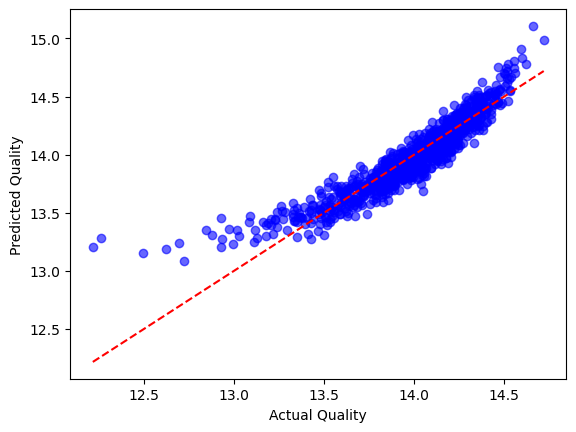

In [85]:
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.show()

### Result

A Linear Regression model was built to predict the house price based on the given features, achieving an R-squared value of 0.8570 and a Mean Squared Error (MSE) of 0.0150.

---